# ***`10. This question should be answered using the Weekly data set, which is part of the ISLR package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1, 089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.`***


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# ***`a. Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?`***

In [2]:
Weekly_Dataset = pd.read_csv("Weekly.csv")
Weekly_Dataset

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


In [3]:
Weekly_Dataset.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


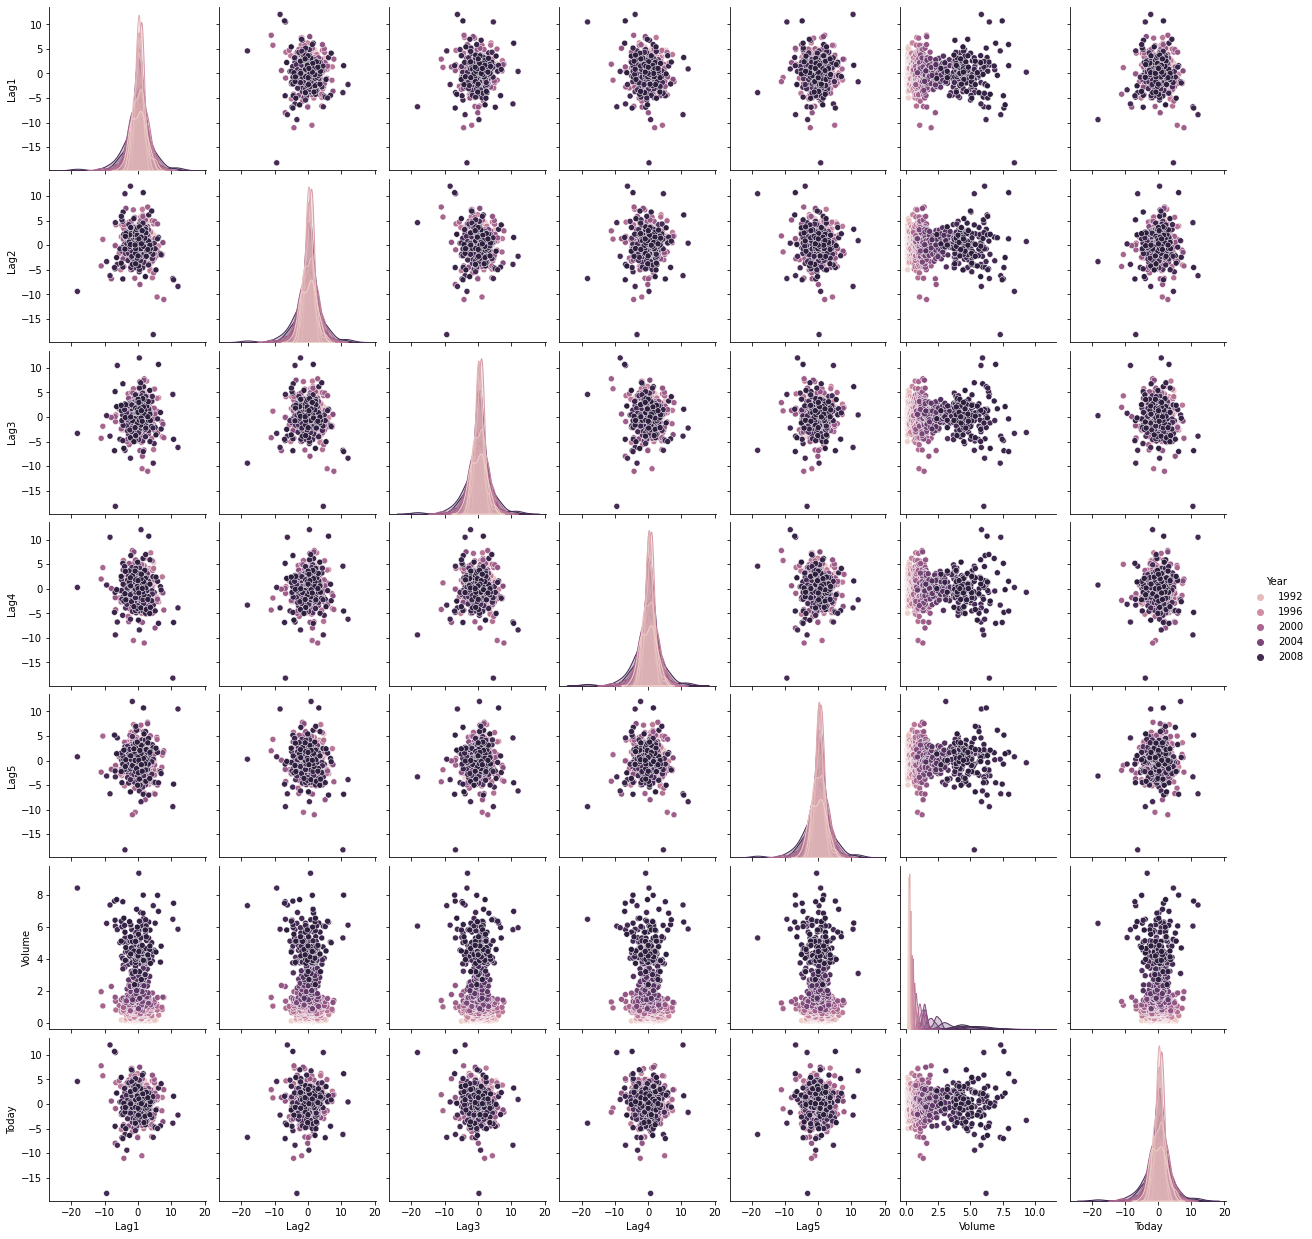

In [ ]:
sns.pairplot(Weekly_Dataset, hue="Year")

In [4]:
Weekly_Dataset.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


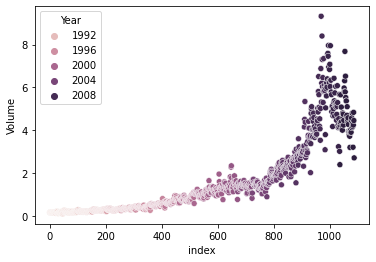

In [5]:
sns.scatterplot(data = Weekly_Dataset.reset_index(),x = "index", y = "Volume", hue="Year")

In [ ]:
# Answer: The correlation is between "Year" and "Volume"

# ***`b. Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?`***

In [6]:
Weekly_Dataset["Binary_Direction"] = Weekly_Dataset["Direction"].map({'Up':1, "Down":0})
Weekly_Dataset

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Binary_Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up,1
...,...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up,1
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up,1
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up,1
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up,1


In [7]:
Logis_Model = smf.logit("Binary_Direction ~ Lag1+Lag2+Lag3+Lag4+Lag5+Volume", data=Weekly_Dataset)
Logis_Model = Logis_Model.fit()
Logis_Model.summary()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Binary_Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Mon, 09 Nov 2020   Pseudo R-squ.:                0.006580
Time:                        01:52:01   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

In [ ]:
# Only Lag2 appears to be statistically significant (p < 0.05)

# ***`c. Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.`***

In [8]:
y_predict = Logis_Model.predict()
y_predict =np.where(y_predict>0.5, 1, 0)
y_truth = Weekly_Dataset["Binary_Direction"]
print("1. Confusion Matrix: ")
print(confusion_matrix(y_truth, y_predict))
print("2. Classification Accuracy: ")
print(accuracy_score(y_truth, y_predict))
print("3. Recall: ")
print(recall_score(y_truth, y_predict))
print("4. Precision: ")
print(precision_score(y_truth, y_predict))
print("5. ROC_AUC: ")
print(roc_auc_score(y_truth, y_predict))

1. Confusion Matrix: 
[[ 54 430]
 [ 48 557]]
2. Classification Accuracy: 
0.5610651974288338
3. Recall: 
0.9206611570247933
4. Precision: 
0.5643363728470111
5. ROC_AUC: 
0.5161157024793388


# ***`d. Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).`***

In [9]:
training_data = Weekly_Dataset[Weekly_Dataset["Year"]<=2008]
training_data


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Binary_Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up,1
...,...,...,...,...,...,...,...,...,...,...
980,2008,12.026,-8.389,-6.198,-3.898,10.491,5.841565,-2.251,Down,0
981,2008,-2.251,12.026,-8.389,-6.198,-3.898,6.093950,0.418,Up,1
982,2008,0.418,-2.251,12.026,-8.389,-6.198,5.932454,0.926,Up,1
983,2008,0.926,0.418,-2.251,12.026,-8.389,5.855972,-1.698,Down,0


In [10]:
testing_data = Weekly_Dataset[Weekly_Dataset["Year"]>2008]
testing_data

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Binary_Direction
985,2009,6.760,-1.698,0.926,0.418,-2.251,3.793110,-4.448,Down,0
986,2009,-4.448,6.760,-1.698,0.926,0.418,5.043904,-4.518,Down,0
987,2009,-4.518,-4.448,6.760,-1.698,0.926,5.948758,-2.137,Down,0
988,2009,-2.137,-4.518,-4.448,6.760,-1.698,6.129763,-0.730,Down,0
989,2009,-0.730,-2.137,-4.518,-4.448,6.760,5.602004,5.173,Up,1
...,...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up,1
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up,1
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up,1
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up,1


In [11]:
Logis_Model = smf.logit("Binary_Direction ~ Lag2", data=training_data)
Logis_Model = Logis_Model.fit()
Logis_Model.summary()

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Binary_Direction   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Mon, 09 Nov 2020   Pseudo R-squ.:                0.003076
Time:                        01:52:12   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.04123
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.029      2.024      0.043       0.002       0.114
==============================================================================
"""

In [12]:
y_predict = Logis_Model.predict(testing_data)
y_predict =np.where(y_predict>0.5, 1, 0)
y_truth = testing_data["Binary_Direction"]
print("1. Confusion Matrix: ")
print(confusion_matrix(y_truth, y_predict))
print("2. Classification Accuracy: ")
print(accuracy_score(y_truth, y_predict))
print("3. Recall: ")
print(recall_score(y_truth, y_predict))
print("4. Precision: ")
print(precision_score(y_truth, y_predict))
print("5. ROC_AUC: ")
print(roc_auc_score(y_truth, y_predict))

1. Confusion Matrix: 
[[ 9 34]
 [ 5 56]]
2. Classification Accuracy: 
0.625
3. Recall: 
0.9180327868852459
4. Precision: 
0.6222222222222222
5. ROC_AUC: 
0.5636675562333207


# ***`e. Repeat (d) using LDA.`***

In [13]:
X_train = training_data['Lag2'].values
X_train = X_train.reshape((len(X_train),1))
y_train = training_data['Binary_Direction']

X_test = testing_data['Lag2'].values
X_test = X_test.reshape((len(X_test),1))
y_test = testing_data['Binary_Direction']
LDA = LinearDiscriminantAnalysis()
Model = LDA.fit(X_train, y_train)

y_predict = Model.predict(X_test)
y_predict =np.where(y_predict>0.5, 1, 0)
y_truth = y_test
print("1. Confusion Matrix: ")
print(confusion_matrix(y_truth, y_predict))
print("2. Classification Accuracy: ")
print(accuracy_score(y_truth, y_predict))
print("3. Recall: ")
print(recall_score(y_truth, y_predict))
print("4. Precision: ")
print(precision_score(y_truth, y_predict))
print("5. ROC_AUC: ")
print(roc_auc_score(y_truth, y_predict))

1. Confusion Matrix: 
[[ 9 34]
 [ 5 56]]
2. Classification Accuracy: 
0.625
3. Recall: 
0.9180327868852459
4. Precision: 
0.6222222222222222
5. ROC_AUC: 
0.5636675562333207


# ***`f. Repeat (d) using QDA.`***

In [14]:
X_train = training_data['Lag2'].values
X_train = X_train.reshape((len(X_train),1))
y_train = training_data['Binary_Direction']

X_test = testing_data['Lag2'].values
X_test = X_test.reshape((len(X_test),1))
y_test = testing_data['Binary_Direction']
QDA = QuadraticDiscriminantAnalysis()
Model = QDA.fit(X_train, y_train)

y_predict = Model.predict(X_test)
y_predict =np.where(y_predict>0.5, 1, 0)
y_truth = y_test
print("1. Confusion Matrix: ")
print(confusion_matrix(y_truth, y_predict))
print("2. Classification Accuracy: ")
print(accuracy_score(y_truth, y_predict))
print("3. Recall: ")
print(recall_score(y_truth, y_predict))
print("4. Precision: ")
print(precision_score(y_truth, y_predict))
print("5. ROC_AUC: ")
print(roc_auc_score(y_truth, y_predict))

1. Confusion Matrix: 
[[ 0 43]
 [ 0 61]]
2. Classification Accuracy: 
0.5865384615384616
3. Recall: 
1.0
4. Precision: 
0.5865384615384616
5. ROC_AUC: 
0.5


# ***`g. Repeat (d) using KNN with K = 1.`***

In [15]:
X_train = training_data['Lag2'].values
X_train = X_train.reshape((len(X_train),1))
y_train = training_data['Binary_Direction']

X_test = testing_data['Lag2'].values
X_test = X_test.reshape((len(X_test),1))
y_test = testing_data['Binary_Direction']
KNN = KNeighborsClassifier(n_neighbors=1)
Model = KNN.fit(X_train, y_train)

y_predict = Model.predict(X_test)
y_predict =np.where(y_predict>0.5, 1, 0)
y_truth = y_test
print("1. Confusion Matrix: ")
print(confusion_matrix(y_truth, y_predict))
print("2. Classification Accuracy: ")
print(accuracy_score(y_truth, y_predict))
print("3. Recall: ")
print(recall_score(y_truth, y_predict))
print("4. Precision: ")
print(precision_score(y_truth, y_predict))
print("5. ROC_AUC: ")
print(roc_auc_score(y_truth, y_predict))

1. Confusion Matrix: 
[[21 22]
 [31 30]]
2. Classification Accuracy: 
0.49038461538461536
3. Recall: 
0.4918032786885246
4. Precision: 
0.5769230769230769
5. ROC_AUC: 
0.49008768585589024


# ***`h. Which of these methods appears to provide the best results on this data?`***

In [16]:
# Logistic regression and LDA appear to provide the best results on this data

# ***`i. Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier.`***